Creating code to determine the initial weight values

In [20]:
import numpy as np

def initialize_weights(layers, sigma=0.01):
    """
    Initialize weights and biases for a neural network.

    Parameters:
        layers (list): A list where each element represents the number of neurons in each layer.
        sigma (float): Standard deviation of the Gaussian distribution for initialization.

    Returns:
        weights (list): A list of weight matrices for each layer.
        biases (list): A list of bias vectors for each layer.
    """
    weights = []
    biases = []

    for i in range(len(layers) - 1):
        # Weight matrix: shape (size of current layer, size of next layer)
        weight_matrix = np.random.normal(0, sigma, (layers[i], layers[i + 1]))
        weights.append(weight_matrix)

        # Bias vector: shape (size of next layer,)
        bias_vector = np.random.normal(0, sigma, (layers[i + 1],))
        biases.append(bias_vector)

    return weights, biases

# Example usage
layers = [3, 5, 2]  # 3 neurons in input layer, 5 in hidden layer, 2 in output layer
sigma = 0.01
weights, biases = initialize_weights(layers, sigma)

# Display initialized weights and biases
for i, (w, b) in enumerate(zip(weights, biases)):
    print(f"Layer {i + 1} -> {i + 2} Weights:\n{w}\n")
    print(f"Layer {i + 1} -> {i + 2} Biases:\n{b}\n")


Layer 1 -> 2 Weights:
[[-0.008893    0.0120974   0.00409877  0.00054474  0.00758704]
 [-0.01246769 -0.0056819  -0.01083802 -0.01155762  0.00853158]
 [-0.01582125  0.0096875  -0.0146082   0.00822229 -0.00794429]]

Layer 1 -> 2 Biases:
[-1.19430827e-05 -7.53295300e-03  5.43645898e-03  1.39559476e-02
 -5.01739452e-03]

Layer 2 -> 3 Weights:
[[ 0.00858618 -0.00644134]
 [ 0.03298797 -0.00521422]
 [ 0.0061335  -0.00167135]
 [-0.00712191  0.0043941 ]
 [ 0.0080316  -0.00920548]]

Layer 2 -> 3 Biases:
[0.01328003 0.01062526]



Implementing forward propagation

In [21]:
import numpy as np

def initialize_weights(layers, sigma=0.01):
    """
    Initialize weights and biases for a neural network.

    Parameters:
        layers (list): A list where each element represents the number of neurons in each layer.
        sigma (float): Standard deviation of the Gaussian distribution for initialization.

    Returns:
        weights (list): A list of weight matrices for each layer.
        biases (list): A list of bias vectors for each layer.
    """
    weights = []
    biases = []

    for i in range(len(layers) - 1):
        # Weight matrix: shape (size of current layer, size of next layer)
        weight_matrix = np.random.normal(0, sigma, (layers[i], layers[i + 1]))
        weights.append(weight_matrix)

        # Bias vector: shape (size of next layer,)
        bias_vector = np.random.normal(0, sigma, (layers[i + 1],))
        biases.append(bias_vector)

    return weights, biases

def forward_propagation(X, weights, biases):
    """
    Perform forward propagation for a three-layer neural network.

    Parameters:
        X (ndarray): Input data, shape (n_samples, n_features).
        weights (list): List of weight matrices.
        biases (list): List of bias vectors.

    Returns:
        activations (list): List of activations for each layer.
    """
    activations = [X]
    current_activation = X

    for W, b in zip(weights, biases):
        Z = np.dot(current_activation, W) + b  # Linear step
        current_activation = np.maximum(0, Z)  # ReLU activation
        activations.append(current_activation)

    return activations

# Example usage
layers = [400, 200, 100]  # Define the number of nodes in each layer
sigma = 0.01
weights, biases = initialize_weights(layers, sigma)

# Simulated input data (e.g., 10 samples with 400 features each)
X = np.random.rand(10, 400)

# Perform forward propagation
activations = forward_propagation(X, weights, biases)

# Display activations for each layer
for i, activation in enumerate(activations):
    print(f"Activations for Layer {i + 1}:\n{activation}\n")


Activations for Layer 1:
[[7.14820652e-01 2.08582317e-01 4.43225765e-01 ... 1.51910716e-01
  8.49580010e-01 5.42076919e-01]
 [9.24974302e-02 2.69443746e-01 9.51139866e-01 ... 2.63475681e-01
  2.94644322e-01 7.48583704e-01]
 [9.85392758e-01 2.73971060e-01 4.20313492e-01 ... 1.85236651e-01
  9.30386992e-02 1.94118424e-01]
 ...
 [8.93711536e-01 8.33225556e-01 6.23090611e-01 ... 3.31631347e-02
  7.60638472e-04 9.53840253e-01]
 [3.76782528e-01 2.42628208e-01 7.97827764e-01 ... 4.13851468e-01
  5.87553655e-01 8.10997970e-01]
 [6.49351132e-01 6.31090187e-01 9.75870374e-01 ... 4.31954385e-01
  7.45705793e-01 2.69180400e-01]]

Activations for Layer 2:
[[0.         0.0248741  0.02771431 ... 0.08859534 0.00125259 0.        ]
 [0.03998078 0.14126905 0.         ... 0.01029624 0.         0.        ]
 [0.         0.         0.10305524 ... 0.09971106 0.01303175 0.        ]
 ...
 [0.02962802 0.06694794 0.         ... 0.04068894 0.         0.        ]
 [0.         0.05641287 0.         ... 0.21345702 0.

Implementing cross-entropy error

In [22]:
import numpy as np

def initialize_weights(layers, sigma=0.01):
    """
    Initialize weights and biases for a neural network.

    Parameters:
        layers (list): A list where each element represents the number of neurons in each layer.
        sigma (float): Standard deviation of the Gaussian distribution for initialization.

    Returns:
        weights (list): A list of weight matrices for each layer.
        biases (list): A list of bias vectors for each layer.
    """
    weights = []
    biases = []

    for i in range(len(layers) - 1):
        # Weight matrix: shape (size of current layer, size of next layer)
        weight_matrix = np.random.normal(0, sigma, (layers[i], layers[i + 1]))
        weights.append(weight_matrix)

        # Bias vector: shape (size of next layer,)
        bias_vector = np.random.normal(0, sigma, (layers[i + 1],))
        biases.append(bias_vector)

    return weights, biases

def forward_propagation(X, weights, biases):
    """
    Perform forward propagation for a three-layer neural network.

    Parameters:
        X (ndarray): Input data, shape (n_samples, n_features).
        weights (list): List of weight matrices.
        biases (list): List of bias vectors.

    Returns:
        activations (list): List of activations for each layer.
    """
    activations = [X]
    current_activation = X

    for W, b in zip(weights, biases):
        Z = np.dot(current_activation, W) + b  # Linear step
        current_activation = np.maximum(0, Z)  # ReLU activation
        activations.append(current_activation)

    return activations

def cross_entropy_loss(y_true, y_pred, epsilon=1e-7):
    """
    Compute the cross-entropy loss for multi-class classification.

    Parameters:
        y_true (ndarray): True labels in one-hot encoded format, shape (n_samples, n_classes).
        y_pred (ndarray): Predicted probabilities, shape (n_samples, n_classes).
        epsilon (float): Small value to avoid log(0).

    Returns:
        float: Cross-entropy loss.
    """
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Avoid log(0)
    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    return loss

# Example usage
layers = [400, 200, 100]  # Define the number of nodes in each layer
sigma = 0.01
weights, biases = initialize_weights(layers, sigma)

# Simulated input data (e.g., 10 samples with 400 features each)
X = np.random.rand(10, 400)

# Simulated one-hot encoded true labels for 10 samples and 100 classes
y_true = np.eye(100)[np.random.choice(100, 10)]

# Perform forward propagation
activations = forward_propagation(X, weights, biases)
y_pred = activations[-1]  # Output layer activations (e.g., probabilities)

# Compute cross-entropy loss
loss = cross_entropy_loss(y_true, y_pred)
print(f"Cross-Entropy Loss: {loss}")

# Display activations for each layer
for i, activation in enumerate(activations):
    print(f"Activations for Layer {i + 1}:{activation}\n")


Cross-Entropy Loss: 13.858081477140448
Activations for Layer 1:[[0.68826722 0.61065264 0.37335541 ... 0.63624244 0.98960932 0.26473729]
 [0.28465726 0.68700456 0.60852851 ... 0.95281702 0.7240988  0.20055036]
 [0.19736064 0.05621252 0.51730548 ... 0.53167261 0.28483371 0.37293523]
 ...
 [0.09562112 0.13763328 0.50227386 ... 0.11798826 0.95130208 0.60013518]
 [0.29423716 0.80713498 0.1642656  ... 0.06852564 0.17409555 0.5759267 ]
 [0.62987623 0.22339089 0.55329971 ... 0.27488114 0.08986047 0.78587647]]

Activations for Layer 2:[[0.07345806 0.05740114 0.         ... 0.         0.10283891 0.        ]
 [0.0859978  0.12042113 0.         ... 0.         0.01815153 0.        ]
 [0.11176409 0.11065724 0.         ... 0.         0.04735958 0.        ]
 ...
 [0.03029271 0.22729025 0.         ... 0.         0.04453929 0.        ]
 [0.06121684 0.12193786 0.         ... 0.         0.09698105 0.        ]
 [0.         0.08347885 0.         ... 0.         0.03964004 0.        ]]

Activations for Layer 3

Implementing backpropagation

In [23]:
import numpy as np

def initialize_weights(layers, sigma=0.01):
    """
    Initialize weights and biases for a neural network.

    Parameters:
        layers (list): A list where each element represents the number of neurons in each layer.
        sigma (float): Standard deviation of the Gaussian distribution for initialization.

    Returns:
        weights (list): A list of weight matrices for each layer.
        biases (list): A list of bias vectors for each layer.
    """
    weights = []
    biases = []

    for i in range(len(layers) - 1):
        # Weight matrix: shape (size of current layer, size of next layer)
        weight_matrix = np.random.normal(0, sigma, (layers[i], layers[i + 1]))
        weights.append(weight_matrix)

        # Bias vector: shape (size of next layer,)
        bias_vector = np.random.normal(0, sigma, (layers[i + 1],))
        biases.append(bias_vector)

    return weights, biases

def forward_propagation(X, weights, biases):
    """
    Perform forward propagation for a three-layer neural network.

    Parameters:
        X (ndarray): Input data, shape (n_samples, n_features).
        weights (list): List of weight matrices.
        biases (list): List of bias vectors.

    Returns:
        activations (list): List of activations for each layer.
    """
    activations = [X]
    current_activation = X

    for W, b in zip(weights, biases):
        Z = np.dot(current_activation, W) + b  # Linear step
        current_activation = np.maximum(0, Z)  # ReLU activation
        activations.append(current_activation)

    return activations

def cross_entropy_loss(y_true, y_pred, epsilon=1e-7):
    """
    Compute the cross-entropy loss for multi-class classification.

    Parameters:
        y_true (ndarray): True labels in one-hot encoded format, shape (n_samples, n_classes).
        y_pred (ndarray): Predicted probabilities, shape (n_samples, n_classes).
        epsilon (float): Small value to avoid log(0).

    Returns:
        float: Cross-entropy loss.
    """
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Avoid log(0)
    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    return loss

def backward_propagation(X, y_true, activations, weights):
    """
    Perform backward propagation for a three-layer neural network.

    Parameters:
        X (ndarray): Input data, shape (n_samples, n_features).
        y_true (ndarray): True labels in one-hot encoded format, shape (n_samples, n_classes).
        activations (list): List of activations from forward propagation.
        weights (list): List of weight matrices.

    Returns:
        gradients (tuple): Gradients for weights and biases.
    """
    gradients_W = [None] * len(weights)
    gradients_b = [None] * len(weights)

    # Calculate gradient of loss w.r.t. the output layer activation
    delta = (activations[-1] - y_true) / y_true.shape[0]  # (batch_size, n_output)

    # Backpropagation for each layer
    for i in reversed(range(len(weights))):
        gradients_W[i] = np.dot(activations[i].T, delta)  # (n_nodes[i], n_nodes[i+1])
        gradients_b[i] = np.sum(delta, axis=0)  # (n_nodes[i+1],)

        if i > 0:  # Skip backpropagation for the input layer
            delta = np.dot(delta, weights[i].T) * (activations[i] > 0)  # ReLU derivative

    return gradients_W, gradients_b

def update_parameters(weights, biases, gradients_W, gradients_b, learning_rate):
    """
    Update weights and biases using gradients and learning rate.

    Parameters:
        weights (list): List of weight matrices.
        biases (list): List of bias vectors.
        gradients_W (list): Gradients of weights.
        gradients_b (list): Gradients of biases.
        learning_rate (float): Learning rate.

    Returns:
        tuple: Updated weights and biases.
    """
    for i in range(len(weights)):
        weights[i] -= learning_rate * gradients_W[i]
        biases[i] -= learning_rate * gradients_b[i]

    return weights, biases

# Example usage
layers = [400, 200, 100]  # Define the number of nodes in each layer
sigma = 0.01
weights, biases = initialize_weights(layers, sigma)

# Simulated input data (e.g., 10 samples with 400 features each)
X = np.random.rand(10, 400)

# Simulated one-hot encoded true labels for 10 samples and 100 classes
y_true = np.eye(100)[np.random.choice(100, 10)]

# Perform forward propagation
activations = forward_propagation(X, weights, biases)
y_pred = activations[-1]  # Output layer activations (e.g., probabilities)

# Compute cross-entropy loss
loss = cross_entropy_loss(y_true, y_pred)
print(f"Cross-Entropy Loss: {loss}")

# Perform backward propagation
gradients_W, gradients_b = backward_propagation(X, y_true, activations, weights)

# Update parameters
learning_rate = 0.01
weights, biases = update_parameters(weights, biases, gradients_W, gradients_b, learning_rate)

# Display activations for each layer
for i, activation in enumerate(activations):
    print(f"Activations for Layer {i + 1}:{activation}\n")

Cross-Entropy Loss: 10.327235455526292
Activations for Layer 1:[[0.22963911 0.23969209 0.38513475 ... 0.82081084 0.82795377 0.07527669]
 [0.1714735  0.64181491 0.18450792 ... 0.90264155 0.61479709 0.28762608]
 [0.83623059 0.96043074 0.05044256 ... 0.57857408 0.97865489 0.75025063]
 ...
 [0.13035444 0.20294456 0.19308071 ... 0.0338795  0.62060663 0.17222418]
 [0.21021202 0.39351993 0.17506135 ... 0.78782695 0.39702684 0.01111421]
 [0.30089769 0.22829107 0.75800722 ... 0.24005554 0.02124979 0.34193045]]

Activations for Layer 2:[[0.         0.         0.02696601 ... 0.02780592 0.         0.03157439]
 [0.         0.         0.         ... 0.05607854 0.07732226 0.09754238]
 [0.0105003  0.         0.         ... 0.08817429 0.         0.18946506]
 ...
 [0.         0.         0.         ... 0.03476344 0.06696187 0.07799151]
 [0.         0.01070709 0.00733175 ... 0.03711957 0.04310908 0.1517841 ]
 [0.         0.         0.04806189 ... 0.01224754 0.07122251 0.11476353]]

Activations for Layer 3

Presumption

In [24]:
import numpy as np

def initialize_weights(layers, sigma=0.01):
    """
    Initialize weights and biases for a neural network.

    Parameters:
        layers (list): A list where each element represents the number of neurons in each layer.
        sigma (float): Standard deviation of the Gaussian distribution for initialization.

    Returns:
        weights (list): A list of weight matrices for each layer.
        biases (list): A list of bias vectors for each layer.
    """
    weights = []
    biases = []

    for i in range(len(layers) - 1):
        # Weight matrix: shape (size of current layer, size of next layer)
        weight_matrix = np.random.normal(0, sigma, (layers[i], layers[i + 1]))
        weights.append(weight_matrix)

        # Bias vector: shape (size of next layer,)
        bias_vector = np.random.normal(0, sigma, (layers[i + 1],))
        biases.append(bias_vector)

    return weights, biases

def forward_propagation(X, weights, biases):
    """
    Perform forward propagation for a three-layer neural network.

    Parameters:
        X (ndarray): Input data, shape (n_samples, n_features).
        weights (list): List of weight matrices.
        biases (list): List of bias vectors.

    Returns:
        activations (list): List of activations for each layer.
    """
    activations = [X]
    current_activation = X

    for W, b in zip(weights, biases):
        Z = np.dot(current_activation, W) + b  # Linear step
        current_activation = np.maximum(0, Z)  # ReLU activation
        activations.append(current_activation)

    return activations

def cross_entropy_loss(y_true, y_pred, epsilon=1e-7):
    """
    Compute the cross-entropy loss for multi-class classification.

    Parameters:
        y_true (ndarray): True labels in one-hot encoded format, shape (n_samples, n_classes).
        y_pred (ndarray): Predicted probabilities, shape (n_samples, n_classes).
        epsilon (float): Small value to avoid log(0).

    Returns:
        float: Cross-entropy loss.
    """
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Avoid log(0)
    loss = -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]
    return loss

def backward_propagation(X, y_true, activations, weights):
    """
    Perform backward propagation to compute gradients for weights and biases.

    Parameters:
        X (ndarray): Input data, shape (n_samples, n_features).
        y_true (ndarray): True labels in one-hot encoded format, shape (n_samples, n_classes).
        activations (list): List of activations from forward propagation.
        weights (list): List of weight matrices.

    Returns:
        grad_weights (list): Gradients of weights for each layer.
        grad_biases (list): Gradients of biases for each layer.
    """
    grad_weights = []
    grad_biases = []

    # Compute gradient for the output layer
    A3 = activations[-1]
    dA3 = (A3 - y_true) / y_true.shape[0]

    # Third layer gradients
    Z2 = activations[-2]
    dW3 = np.dot(Z2.T, dA3)
    db3 = np.sum(dA3, axis=0)
    grad_weights.insert(0, dW3)
    grad_biases.insert(0, db3)

    # Second layer gradients
    dZ2 = np.dot(dA3, weights[-1].T) * (Z2 > 0)
    Z1 = activations[-3]
    dW2 = np.dot(Z1.T, dZ2)
    db2 = np.sum(dZ2, axis=0)
    grad_weights.insert(0, dW2)
    grad_biases.insert(0, db2)

    # First layer gradients
    dZ1 = np.dot(dZ2, weights[-2].T) * (Z1 > 0)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0)
    grad_weights.insert(0, dW1)
    grad_biases.insert(0, db1)

    return grad_weights, grad_biases

def update_parameters(weights, biases, grad_weights, grad_biases, learning_rate):
    """
    Update weights and biases using gradients and learning rate.

    Parameters:
        weights (list): List of weight matrices.
        biases (list): List of bias vectors.
        grad_weights (list): Gradients of weights.
        grad_biases (list): Gradients of biases.
        learning_rate (float): Learning rate for updates.

    Returns:
        Updated weights and biases.
    """
    for i in range(len(weights)):
        weights[i] -= learning_rate * grad_weights[i]
        biases[i] -= learning_rate * grad_biases[i]

    return weights, biases

def predict(X, weights, biases):
    """
    Perform prediction by identifying the highest probability class for each sample.

    Parameters:
        X (ndarray): Input data, shape (n_samples, n_features).
        weights (list): List of weight matrices.
        biases (list): List of bias vectors.

    Returns:
        predictions (ndarray): Predicted class indices for each sample.
    """
    activations = forward_propagation(X, weights, biases)
    probabilities = activations[-1]
    predictions = np.argmax(probabilities, axis=1)  # Class with highest probability
    return predictions

# Example usage
layers = [400, 200, 100, 10]  # Define the number of nodes in each layer
sigma = 0.01
weights, biases = initialize_weights(layers, sigma)

# Simulated input data (e.g., 10 samples with 400 features each)
X = np.random.rand(10, 400)

# Simulated one-hot encoded true labels for 10 samples and 10 classes
y_true = np.eye(10)[np.random.choice(10, 10)]

# Perform forward propagation
activations = forward_propagation(X, weights, biases)
y_pred = activations[-1]  # Output layer activations (e.g., probabilities)

# Compute cross-entropy loss
loss = cross_entropy_loss(y_true, y_pred)
print(f"Cross-Entropy Loss: {loss}")

# Perform backward propagation
grad_weights, grad_biases = backward_propagation(X, y_true, activations, weights)

# Update weights and biases
learning_rate = 0.01
weights, biases = update_parameters(weights, biases, grad_weights, grad_biases, learning_rate)

# Make predictions
predictions = predict(X, weights, biases)
print(f"Predicted classes: {predictions}")

# Display activations for each layer
for i, activation in enumerate(activations):
    print(f"Activations for Layer {i + 1}:{activation}\n")


Cross-Entropy Loss: 10.769233353744813
Predicted classes: [5 5 5 5 5 5 5 5 5 5]
Activations for Layer 1:[[0.99288888 0.43704838 0.58592383 ... 0.43783593 0.54897642 0.3412703 ]
 [0.45546955 0.0715167  0.37784709 ... 0.22561393 0.09355345 0.75566543]
 [0.51882111 0.0011168  0.52032725 ... 0.15673749 0.78973432 0.44730768]
 ...
 [0.39728011 0.76079065 0.5635792  ... 0.58109506 0.12046604 0.22478783]
 [0.36035762 0.69620548 0.56786238 ... 0.02831185 0.26936633 0.66647563]
 [0.32614896 0.87331877 0.33596096 ... 0.60049318 0.60989284 0.78469224]]

Activations for Layer 2:[[0.14577952 0.         0.0370038  ... 0.10091515 0.         0.06436349]
 [0.19774622 0.10224578 0.11204914 ... 0.06119342 0.         0.19006465]
 [0.0900575  0.         0.02692432 ... 0.06808079 0.         0.16806886]
 ...
 [0.10683519 0.05709723 0.23440194 ... 0.01507091 0.         0.03099459]
 [0.14733714 0.04902987 0.03550779 ... 0.07806824 0.         0.20546918]
 [0.1928471  0.         0.14561041 ... 0.12673754 0.     

Learning and Estimation

In [25]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the images

# Build a neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D array
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the accuracy
print(f'Test accuracy: {test_acc}')


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8784 - loss: 0.4256
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9646 - loss: 0.1209
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9767 - loss: 0.0804
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9827 - loss: 0.0570
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9874 - loss: 0.0432
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.0809
Test accuracy: 0.9769999980926514


Plotting


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8751 - loss: 0.4377 - val_accuracy: 0.9619 - val_loss: 0.1366
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9648 - loss: 0.1185 - val_accuracy: 0.9729 - val_loss: 0.0921
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9775 - loss: 0.0768 - val_accuracy: 0.9737 - val_loss: 0.0838
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9843 - loss: 0.0561 - val_accuracy: 0.9771 - val_loss: 0.0724
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9882 - loss: 0.0405 - val_accuracy: 0.9773 - val_loss: 0.0718


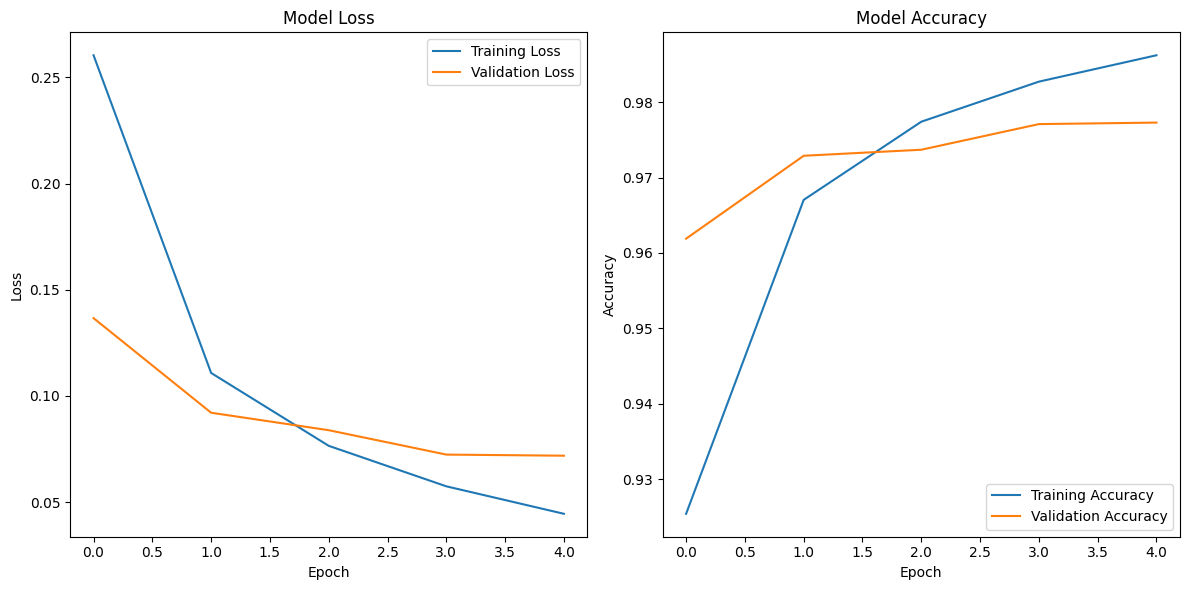

In [26]:
# Importing necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the images

# Build a neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D array
    layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and store the history
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Plot the learning curve
# Plot training & validation loss values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


Confirmation of misscalculations

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8776 - loss: 0.4255 - val_accuracy: 0.9618 - val_loss: 0.1314
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9642 - loss: 0.1223 - val_accuracy: 0.9679 - val_loss: 0.1004
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9752 - loss: 0.0807 - val_accuracy: 0.9715 - val_loss: 0.0890
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9821 - loss: 0.0592 - val_accuracy: 0.9754 - val_loss: 0.0835
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9867 - loss: 0.0440 - val_accuracy: 0.9775 - val_loss: 0.0759
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Total misclassified images: 225


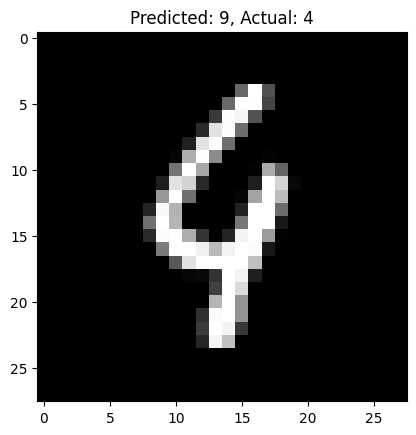

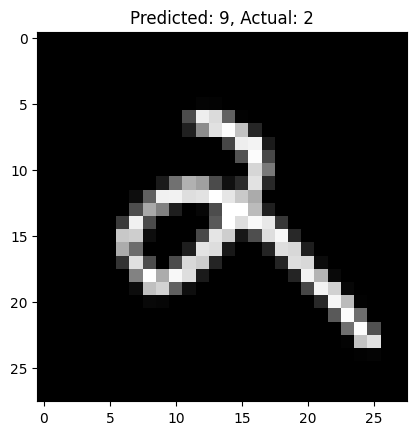

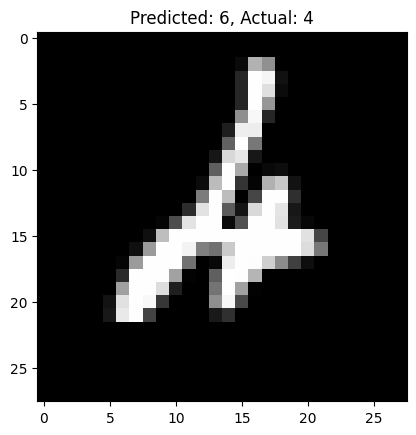

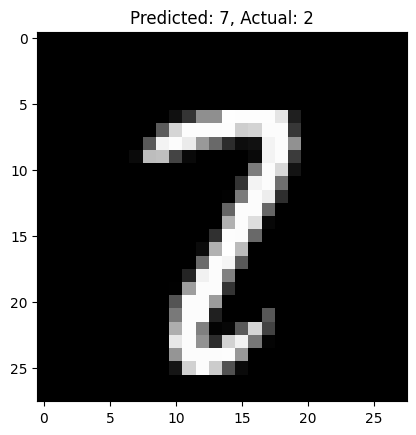

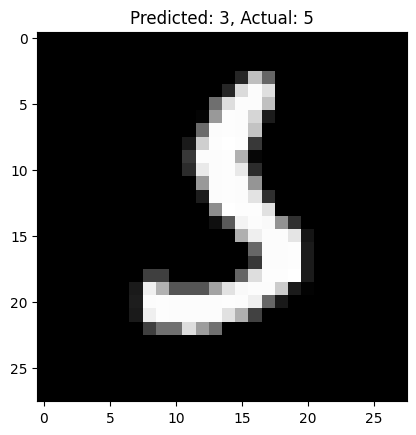

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the images

# Build the model (same as before)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Get model predictions on the test set
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # Convert predictions to labels

# Find the indices of misclassified images
misclassified_indices = np.where(y_pred_labels != y_test)[0]

# Visualize misclassified images
num_misclassified = len(misclassified_indices)
print(f'Total misclassified images: {num_misclassified}')

# Show a few misclassified images
for i in range(min(5, num_misclassified)):  # Show up to 5 misclassified images
    index = misclassified_indices[i]
    plt.imshow(x_test[index], cmap='gray')
    plt.title(f'Predicted: {y_pred_labels[index]}, Actual: {y_test[index]}')
    plt.show()


In [30]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

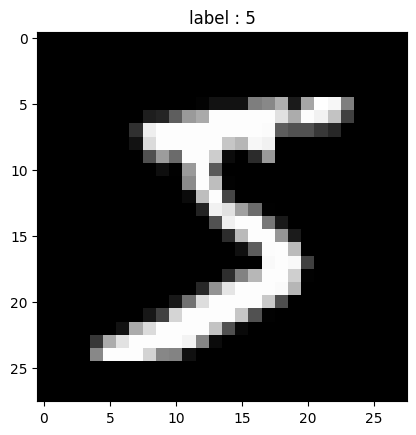

In [31]:
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)


import matplotlib.pyplot as plt
%matplotlib inline
index = 0
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

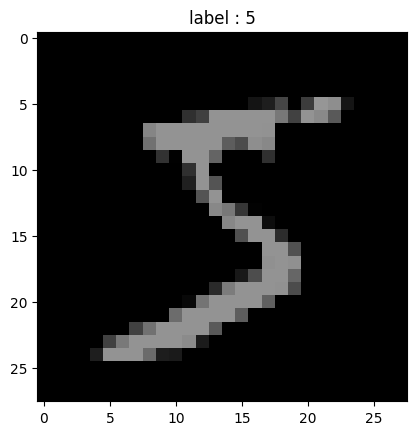

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [32]:
import numpy as np
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray', vmin = 0, vmax = 255)
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image)